#### 20/20. Good job Heidi. 

In [41]:
# Python version 3.9.12, conda version 22.9.0

import numpy as np # v 1.21.5
import sklearn # v 0.0
import pandas as pd # v 1.4.2
import matplotlib.pyplot as plt # v 3.5.1
import statsmodels.api as sm # v.0.13.2

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn import metrics 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

In [42]:
df = pd.read_csv("/Users/heidibeardsley/Downloads/loan_default_data_set.csv")

In [43]:
# correcting missing values

df['pct_card_over_50_uti']=df['pct_card_over_50_uti'].fillna(df['pct_card_over_50_uti'].mean())
df['rep_income']=df['rep_income'].fillna(df['rep_income'].mean())
df.dropna(axis=0, inplace = True)
df.isna().sum()

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
dtype: int64

In [44]:
# creating dummy variables for qualitative data

rep_education = pd.get_dummies(df['rep_education'], drop_first=True)
df.drop('rep_education',axis=1,inplace=True)
df = pd.concat([df,rep_education], axis=1)
df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind,graduate,high_school,other
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,0.366737,0.342183,0.513934,0.550866,0,118266.32130,0,0,0,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0.490809,0.540671,0.418016,0.550964,0,89365.05765,0,0,0,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0.359074,0.338560,0.341627,0.451417,0,201365.12130,0,0,0,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,0.700379,0.683589,0.542940,0.607843,0,191794.48550,0,0,0,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0.647351,0.510812,0.632934,0.573680,0,161465.36790,0,1,0,0


In [45]:
# Splitting the data into two dataframes, defaulted and not defaulted

by_class = df.groupby('Def_ind')
defaulted = by_class.get_group(1)
not_defaulted = by_class.get_group(0)

In [46]:
defaulted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 14 to 19998
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      2000 non-null   float64
 1   avg_bal_cards                    2000 non-null   float64
 2   credit_age                       2000 non-null   int64  
 3   credit_age_good_account          2000 non-null   int64  
 4   credit_card_age                  2000 non-null   int64  
 5   num_acc_30d_past_due_12_months   2000 non-null   int64  
 6   num_acc_30d_past_due_6_months    2000 non-null   int64  
 7   num_mortgage_currently_past_due  2000 non-null   int64  
 8   tot_amount_currently_past_due    2000 non-null   float64
 9   num_inq_12_month                 2000 non-null   int64  
 10  num_card_inq_24_month            2000 non-null   int64  
 11  num_card_12_month                2000 non-null   int64  
 12  num_auto_ 36_month

In [47]:
not_defaulted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17999 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      17999 non-null  float64
 1   avg_bal_cards                    17999 non-null  float64
 2   credit_age                       17999 non-null  int64  
 3   credit_age_good_account          17999 non-null  int64  
 4   credit_card_age                  17999 non-null  int64  
 5   num_acc_30d_past_due_12_months   17999 non-null  int64  
 6   num_acc_30d_past_due_6_months    17999 non-null  int64  
 7   num_mortgage_currently_past_due  17999 non-null  int64  
 8   tot_amount_currently_past_due    17999 non-null  float64
 9   num_inq_12_month                 17999 non-null  int64  
 10  num_card_inq_24_month            17999 non-null  int64  
 11  num_card_12_month                17999 non-null  int64  
 12  num_auto_ 36_month

In [48]:
# Part A - oversampling
# creating the oversampled dataframe for defaulted to match the number of observations in not_defaulted

defaulted_oversampled = resample(defaulted,random_state=7,n_samples=16000,replace=True)
df_defaulted_oversampled = pd.concat([defaulted_oversampled,defaulted])

In [49]:
df_defaulted_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 1855 to 19998
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      18000 non-null  float64
 1   avg_bal_cards                    18000 non-null  float64
 2   credit_age                       18000 non-null  int64  
 3   credit_age_good_account          18000 non-null  int64  
 4   credit_card_age                  18000 non-null  int64  
 5   num_acc_30d_past_due_12_months   18000 non-null  int64  
 6   num_acc_30d_past_due_6_months    18000 non-null  int64  
 7   num_mortgage_currently_past_due  18000 non-null  int64  
 8   tot_amount_currently_past_due    18000 non-null  float64
 9   num_inq_12_month                 18000 non-null  int64  
 10  num_card_inq_24_month            18000 non-null  int64  
 11  num_card_12_month                18000 non-null  int64  
 12  num_auto_ 36_mo

In [50]:
# concatenating the oversampled defaulted and not_defaulted to creat a dataframe with 36,000 observations

df_oversampled = pd.concat([df_defaulted_oversampled,not_defaulted])
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35999 entries, 1855 to 19999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      35999 non-null  float64
 1   avg_bal_cards                    35999 non-null  float64
 2   credit_age                       35999 non-null  int64  
 3   credit_age_good_account          35999 non-null  int64  
 4   credit_card_age                  35999 non-null  int64  
 5   num_acc_30d_past_due_12_months   35999 non-null  int64  
 6   num_acc_30d_past_due_6_months    35999 non-null  int64  
 7   num_mortgage_currently_past_due  35999 non-null  int64  
 8   tot_amount_currently_past_due    35999 non-null  float64
 9   num_inq_12_month                 35999 non-null  int64  
 10  num_card_inq_24_month            35999 non-null  int64  
 11  num_card_12_month                35999 non-null  int64  
 12  num_auto_ 36_mo

In [51]:
# creating the test and training sets

X = df_oversampled.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]]
y = df_oversampled["Def_ind"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [52]:
# fitting the Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [53]:
# metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "micro")
recall = recall_score(y_test, y_pred, average = "micro")
print(accuracy)
print(precision)
print(recall)

# An accuracy score of 0.64 shows the model is correct 0.64 overall.
# A precision score of 0.64  shows the model is correct 0.64 when predicting the target class.
# A recall score of 0.64 shows the model can find all objects of the target class 0.64 of the time.

0.637962962962963
0.637962962962963
0.637962962962963


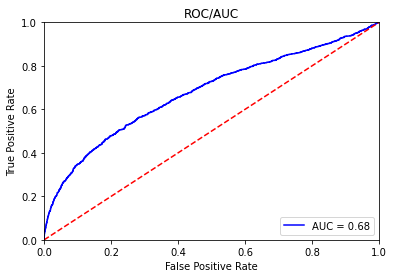

In [54]:
# creating the ROC/AUC plot.

probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC/AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
# fitting the LDA model

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [56]:
# metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "micro")
recall = recall_score(y_test, y_pred, average = "micro")
print(accuracy)
print(precision)
print(recall)

# An accuracy score of 0.72 shows the model is correct 0.72 overall.
# A precision score of 0.72  shows the model is correct 0.72 when predicting the target class.
# A recall score of 0.72 shows the model can find all objects of the target class 0.72 of the time.

0.7238888888888889
0.7238888888888889
0.7238888888888889


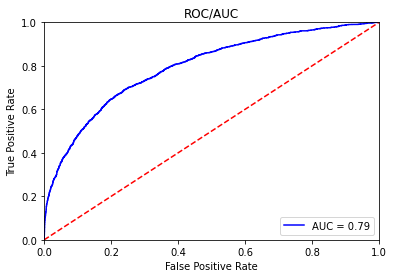

In [57]:
# creating the ROC/AUC plot

probs = lda.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC/AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
# Part B - undersampling
# creating the undersampled dataframe by randomly choosing 2000 samples

not_defaulted_undersampled = resample(not_defaulted,random_state=7,n_samples=2000,replace=True)
not_defaulted_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 18806 to 1111
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      2000 non-null   float64
 1   avg_bal_cards                    2000 non-null   float64
 2   credit_age                       2000 non-null   int64  
 3   credit_age_good_account          2000 non-null   int64  
 4   credit_card_age                  2000 non-null   int64  
 5   num_acc_30d_past_due_12_months   2000 non-null   int64  
 6   num_acc_30d_past_due_6_months    2000 non-null   int64  
 7   num_mortgage_currently_past_due  2000 non-null   int64  
 8   tot_amount_currently_past_due    2000 non-null   float64
 9   num_inq_12_month                 2000 non-null   int64  
 10  num_card_inq_24_month            2000 non-null   int64  
 11  num_card_12_month                2000 non-null   int64  
 12  num_auto_ 36_mon

In [59]:
# concatenating the undersampled dataframe with the defaulted dataframe

df_undersampled = pd.concat([not_defaulted_undersampled,defaulted])
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 18806 to 19998
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      4000 non-null   float64
 1   avg_bal_cards                    4000 non-null   float64
 2   credit_age                       4000 non-null   int64  
 3   credit_age_good_account          4000 non-null   int64  
 4   credit_card_age                  4000 non-null   int64  
 5   num_acc_30d_past_due_12_months   4000 non-null   int64  
 6   num_acc_30d_past_due_6_months    4000 non-null   int64  
 7   num_mortgage_currently_past_due  4000 non-null   int64  
 8   tot_amount_currently_past_due    4000 non-null   float64
 9   num_inq_12_month                 4000 non-null   int64  
 10  num_card_inq_24_month            4000 non-null   int64  
 11  num_card_12_month                4000 non-null   int64  
 12  num_auto_ 36_mo

In [60]:
# creating the test and training sets

X = df_undersampled.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]]
y = df_undersampled["Def_ind"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [61]:
# fitting the Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [62]:
# metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "micro")
recall = recall_score(y_test, y_pred, average = "micro")
print(accuracy)
print(precision)
print(recall)

# An accuracy score of 0.66 shows the model is correct 0.66 overall.
# A precision score of 0.66  shows the model is correct 0.66 when predicting the target class.
# A recall score of 0.66 shows the model can find all objects of the target class 0.66 of the time.

0.66
0.66
0.66


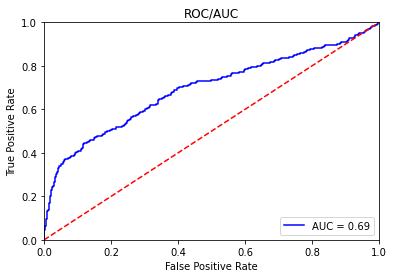

In [63]:
# creating the ROC/AUC plot.

probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC/AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
# fitting the LDA model

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [65]:
# metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "micro")
recall = recall_score(y_test, y_pred, average = "micro")
print(accuracy)
print(precision)
print(recall)

# An accuracy score of 0.73 shows the model is correct 0.73 overall.
# A precision score of 0.73  shows the model is correct 0.73 when predicting the target class.
# A recall score of 0.73 shows the model can find all objects of the target class 0.73 of the time.

0.7275
0.7275
0.7275


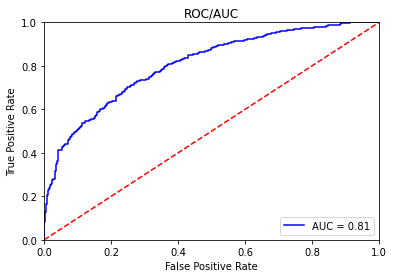

In [66]:
# creating the ROC/AUC plot

probs = lda.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC/AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
# Part C - SMOTE

In [68]:
# training and test sets

X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]]
y = df["Def_ind"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [69]:
print("Number observations X_train dataset: ", X_train.shape) 
print("Number observations y_train dataset: ", y_train.shape) 
print("Number observations X_test dataset: ", X_test.shape) 
print("Number observations y_test dataset: ", y_test.shape) 

Number observations X_train dataset:  (13999, 19)
Number observations y_train dataset:  (13999,)
Number observations X_test dataset:  (6000, 19)
Number observations y_test dataset:  (6000,)


In [70]:
# using SMOTE to perform oversampling

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [71]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (25278, 19)
After OverSampling, the shape of train_y: (25278,) 

After OverSampling, counts of label '1': 12639
After OverSampling, counts of label '0': 12639


In [72]:
# fitting the Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train_res, y_train_res.ravel())
y_pred = lr.predict(X_test)

In [73]:
# metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "micro")
recall = recall_score(y_test, y_pred, average = "micro")
print(accuracy)
print(precision)
print(recall)

# An accuracy score of 0.75 shows the model is correct 0.75 overall.
# A precision score of 0.75 shows the model is correct 0.75 when predicting the target class.
# A recall score of 0.75 shows the model can find all objects of the target class 0.75 of the time.

0.7456666666666667
0.7456666666666667
0.7456666666666667


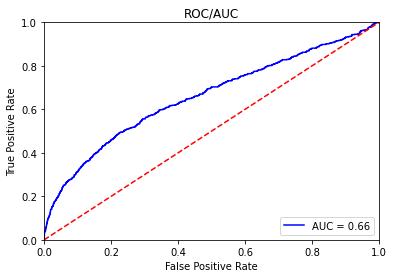

In [74]:
# creating the ROC/AUC plot

probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC/AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
# fitting the LDA model

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_res, y_train_res.ravel())
y_pred = lda.predict(X_test)

In [76]:
# metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "micro")
recall = recall_score(y_test, y_pred, average = "micro")
print(accuracy)
print(precision)
print(recall)

# An accuracy score of 0.71 shows the model is correct 0.71 overall.
# A precision score of 0.71 shows the model is correct 0.71 when predicting the target class.
# A recall score of 0.71 shows the model can find all objects of the target class 0.71 of the time.

0.7095
0.7095
0.7095


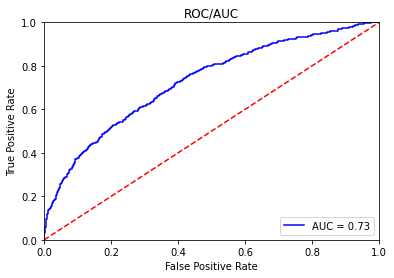

In [77]:
# creating the ROC/AUC plot

probs = lda.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC/AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
# The LDA model on the undersampled data had the highest AUC value (0.81), so that is the best model.